In [158]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import folium
import webbrowser
import numpy as np
import os
import json


In [143]:
def get_weather_data_by_city(city_name, params):
    # Update the params dictionary to include the city name
    params.update({"q": city_name})
    
    # API endpoint for weather by city name
    url = f"https://api.openweathermap.org/data/2.5/weather"
    
    # Make a GET request to the API with parameters
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        weather_data = response.json()
        
        # Extract relevant data
        data = {
            "City": weather_data.get("name"),
            "Country": weather_data["sys"]["country"],
            "Temperature": weather_data["main"]["temp"],
            "Humidity": weather_data["main"]["humidity"],
            "Pressure": weather_data["main"]["pressure"],
            "Weather": weather_data["weather"][0]["description"],
            "Latitude": weather_data["coord"]["lat"],
            "Longitude": weather_data["coord"]["lon"]
        }
        return data
    else:
        print(f"Error: Unable to fetch data for {city_name}. HTTP Status Code: {response.status_code}")
        return None

def save_weather_data(data, filename='weather_data.csv'):
    # Create a DataFrame from the data
    df = pd.DataFrame([data])
    
    # Check if the file exists and overwrite it, else create new with header
    if os.path.exists(filename):
        df.to_csv(filename, mode='a', index=False, header=False)
    else:
        df.to_csv(filename, mode='w', index=False, header=True)



# Parameters dictionary (no lat/lon needed, use city name instead)
params = {
    "appid": "81befeb933feb345eceff96be72fc5b5",
    "lang": "en",
    "units": "metric"  # To get temperature in Celsius
}

print("Weather data saved to weather_data.csv")


Weather data saved to weather_data.csv


In [144]:
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/geonames-all-cities-with-a-population-1000/records?limit=100&refine=timezone%3A%22Europe%22"
response = requests.get(url)
json_data = response.json()

In [159]:
if 'application/json' in response.headers.get('Content-Type'):
    data = response.json()  # Parse the JSON

    # Normalize the 'results' list of dicts and load into a DataFrame
    json_data = data['results']  # Get the list of records (cities)
    json_str = json.dumps(json_data)  # Convert it to a string

    df = pd.read_json(StringIO(json_str))

df

,geoname_id,name,ascii_name,alternate_names,feature_class,feature_code,country_code,cou_name_en,country_code_2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,label_en,coordinates
0,363363,Finiq,Finiq,"[Eniki, Fenichi, Finik, Finiq, Finiqi, Firiq]",P,PPLA3,AL,Albania,NaN,51,10944423.0,363364.0,NaN,0,NaN,37,Europe/Tirane,2023-01-01,Albania,"{'lon': 20.05833, 'lat': 39.90639}"
1,781886,Qereshnik,Qereshnik,"[Kereshniku, Qereshnik, Qereshniku, Qerreshnik...",P,PPL,AL,Albania,NaN,40,10944368.0,12501074.0,NaN,1105,NaN,359,Europe/Tirane,2023-12-24,Albania,"{'lon': 20.00972, 'lat': 40.76333}"
2,782037,Pirg,Pirg,"[Pirg, Pirgu, Pirk, Пирк]",P,PPLA3,AL,Albania,NaN,46,10944403.0,782038.0,NaN,0,NaN,871,Europe/Tirane,2023-01-01,Albania,"{'lon': 20.70611, 'lat': 40.785}"
3,782140,Orenjë,Orenje,"[Oreja, Orene, Orenja, Orenje, Orenjë, Orhenja...",P,PPLA3,AL,Albania,NaN,43,10944384.0,782141.0,NaN,0,NaN,802,Europe/Tirane,2023-01-01,Albania,"{'lon': 20.21194, 'lat': 41.28472}"
4,782443,Lunik,Lunik,"[Ljumnik, Lumnik, Lunik, Lunike, Luniku, Lunikë]",P,PPLA3,AL,Albania,NaN,43,10944384.0,782444.0,NaN,0,NaN,668,Europe/Tirane,2023-01-01,Albania,"{'lon': 20.32361, 'lat': 41.28917}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,598272,Kėdainiai,Kedainiai,"[Kedaini, Kedainiai, Kedainiu, Kedainių, Kedaj...",P,PPLA2,LT,Lithuania,NaN,57,53.0,5301.0,NaN,22677,NaN,39,Europe/Vilnius,2022-09-26,Lithuania,"{'lon': 23.97275, 'lat': 55.28782}"
96,598796,Joniškis,Joniskis,"[Gioniskis, Ionishkis, Janiszki, Jonischki, Jo...",P,PPLA2,LT,Lithuania,NaN,61,47.0,4760.0,NaN,11113,NaN,50,Europe/Vilnius,2021-04-26,Lithuania,"{'lon': 23.61541, 'lat': 56.23939}"
97,10062606,Vilkpėdė,Vilkpede,None,P,PPLX,LT,Lithuania,NaN,65,13.0,1317.0,NaN,21346,NaN,132,Europe/Vilnius,2021-04-26,Lithuania,"{'lon': 25.2477, 'lat': 54.66969}"
98,2960054,Strassen,Strassen,[Strassen],P,PPLA3,LU,Luxembourg,NaN,LU,8.0,NaN,NaN,6006,NaN,309,Europe/Luxembourg,2017-10-02,Luxembourg,"{'lon': 6.07333, 'lat': 49.62056}"


In [147]:
for city in df['name']:
    weather_data = get_weather_data_by_city(city, params)
    save_weather_data(weather_data, filename='weather_data.csv')


Error: Unable to fetch data for Peza e Madhe. HTTP Status Code: 404
Error: Unable to fetch data for Allambres. HTTP Status Code: 404
Error: Unable to fetch data for Lapardha Dy. HTTP Status Code: 404


In [153]:
weather = pd.read_csv('weather_data.csv')
weather.dropna()
weather_sorted = weather.sort_values(by='Temperature')
weather.describe()

,Temperature,Humidity,Pressure,Latitude,Longitude
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,12.930103,70.061856,1012.103093,47.720493,15.093373
std,3.868750,15.765082,2.425921,3.205794,3.972694
min,1.040000,41.000000,1010.000000,39.905800,5.748600
25%,11.640000,58.000000,1011.000000,47.201900,13.133300
50%,13.560000,70.000000,1011.000000,47.711100,14.980800
75%,15.240000,80.000000,1012.000000,48.271200,16.334800
max,19.850000,99.000000,1022.000000,56.240300,25.243800


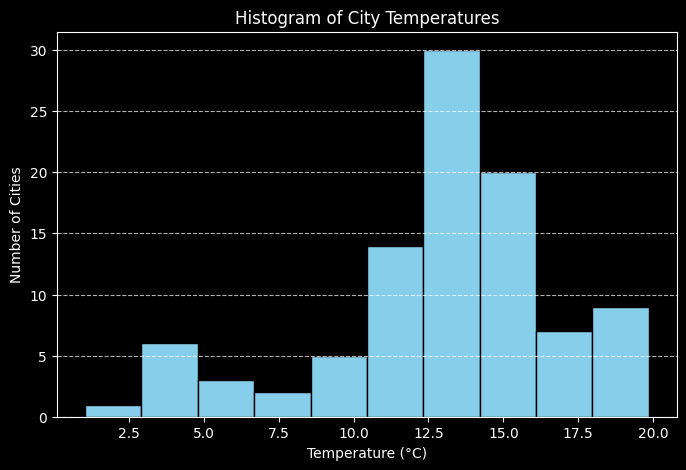

In [155]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
plt.hist(weather_sorted['Temperature'], color='skyblue', edgecolor='black')
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Cities")
plt.title("Histogram of City Temperatures")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the histogram as PNG
plt.savefig('temperature_histogram.png', format='png')

# Show the plot
plt.show()


/var/folders/pv/n353z_zd7n7d9hncj3kgmxy80000gn/T/ipykernel_32291/3312488650.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weather_sorted['City'], rotation=90)  # Ensure correct column name


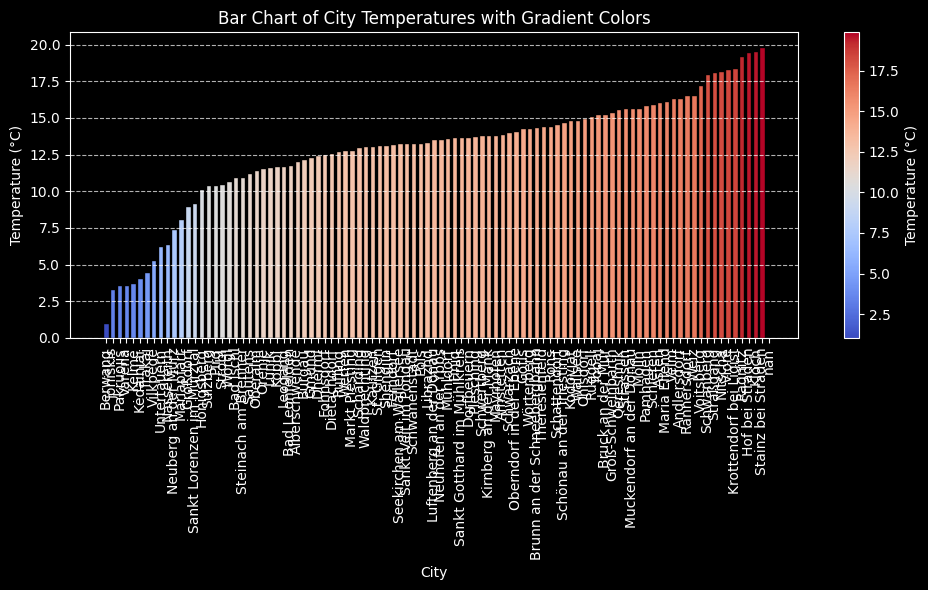

In [ ]:
norm = plt.Normalize(weather_sorted['Temperature'].min(), weather_sorted['Temperature'].max())
cmap = plt.get_cmap('coolwarm')  # Blue to red colormap

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with gradient colors
bars = ax.bar(weather_sorted['City'].astype(str), weather_sorted['Temperature'], 
              color=cmap(norm(weather_sorted['Temperature'])), edgecolor='black')

# Add labels and title
ax.set_xlabel("City")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Bar Chart of City Temperatures with Gradient Colors")

# Rotate x-axis labels to avoid overlap
ax.set_xticklabels(weather_sorted['City'], rotation=90)  # Ensure correct column name
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Add colorbar to show the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for the colorbar
cbar = fig.colorbar(sm, ax=ax, label='Temperature (°C)')

# Save the plot as PNG
plt.tight_layout() 
plt.savefig('city_temperatures.png', format='png')

# Show the plot
plt.show()


In [ ]:
weather_cleaned = weather.dropna(subset=['Latitude', 'Longitude'])


map_center = [weather_cleaned['Latitude'].mean(), weather_cleaned['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5, tiles="Cartodb dark_matter")

for idx, row in weather_cleaned.iterrows():
    city = row['City']
    country = row['Country']
    temp = row['Temperature']
    humidity = row['Humidity']
    pressure = row['Pressure']
    weather_desc = row['Weather']
    lat = row['Latitude']
    lon = row['Longitude']

    popup_content = f"""
    <strong>City:</strong> {city}, {country}<br>
    <strong>Temperature:</strong> {temp} °C<br>
    <strong>Humidity:</strong> {humidity}%<br>
    <strong>Pressure:</strong> {pressure} hPa<br>
    <strong>Weather:</strong> {weather_desc}
    """

    folium.Marker([lat, lon], popup=folium.Popup(popup_content, max_width=300)).add_to(m)

map_filename = 'weather_map.html'
m.save(map_filename)

print(f"The cleaned map has been saved as '{map_filename}'.")

webbrowser.open(f'file://{os.path.realpath(map_filename)}')


The cleaned map has been saved as 'weather_map.html'.


True